In [1]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import import_ipynb
from ipynb.fs.full.Jaccard_Architecture import unet_model_with_jaccard
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import tensorboard
from skimage.io import imread,imshow

## Preparing images for the input layer

In [2]:
parent_directory = '../../../../../../../Applications/PHYS499/UNET/dataset01_1695/stage1_train/'

SIZE = 256
image_dataset = []
mask_dataset = []

direc = os.listdir(parent_directory)
for i,folder_name in enumerate(direc):
    if (folder_name.split('.')[1] == 'png'):
        
        path = parent_directory + folder_name + '/image/' + folder_name
        image = cv2.imread(path,0)
        image = Image.fromarray(image)
        image = image.resize((SIZE,SIZE))
        image_dataset.append(np.array(image))

In [3]:
direc = os.listdir(parent_directory)
for i,folder_name in enumerate(direc):
    if (folder_name.split('.')[1] == 'png'):
        
        path = parent_directory + folder_name + '/mask/' + folder_name
        mask = cv2.imread(path,0)
        mask = Image.fromarray(mask)
        mask = mask.resize((SIZE,SIZE))
        mask_dataset.append(np.array(mask))

In [4]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

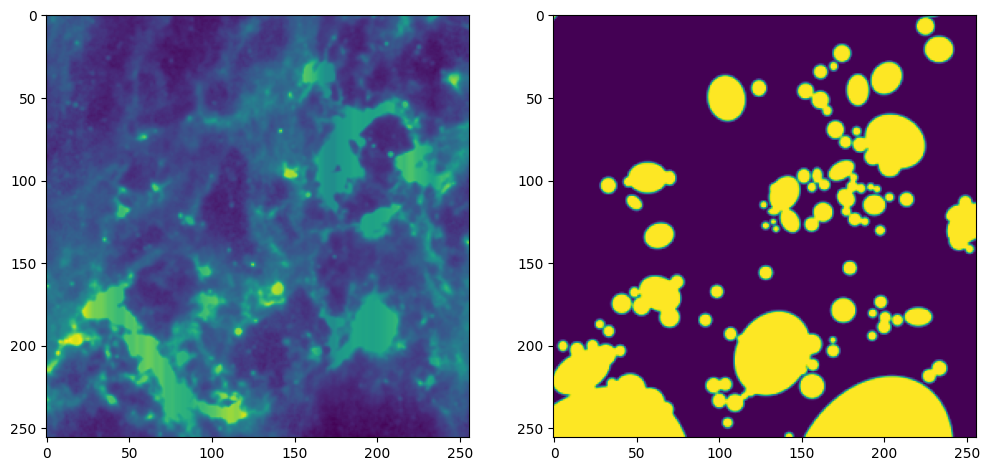

In [6]:
X_train = image_dataset
y_train = mask_dataset
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)))
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)))

In [7]:
IMG_WIDTH = image_dataset.shape[1]
IMG_HEIGHT = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

model = unet_model_with_jaccard(IMG_HEIGHT=IMG_HEIGHT,IMG_WIDTH=IMG_WIDTH,IMG_CHANNELS=IMG_CHANNELS)

Metal device set to: Apple M1


2023-04-12 13:01:38.443649: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-12 13:01:38.444251: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 256, 256, 16  64         ['conv2d_1[1][0]']               
 rmalization)                   )                                                             

 concatenate_2 (Concatenate)    (None, 128, 128, 64  0           ['conv2d_transpose_2[1][0]',     
                                )                                 'activation_3[1][0]']           
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 64  36928       ['concatenate_2[1][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 128, 128, 64  256        ['conv2d_15[1][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_15 (Activation)     (None, 128, 128, 64  0           ['batch_normalization_15[1][0]'] 
          

In [9]:
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    ModelCheckpoint('../Saved Models/1695_JACCARD.h5',verbose=1,save_best_only=True)
]

results = model.fit(X_train,y_train,validation_split=0.1,batch_size=32,epochs=50,callbacks=callbacks)

Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: -0.2977 - jaccard_coef: 0.2985

2023-04-12 13:02:57.404364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to -0.11054, saving model to ../Saved Models/1695_JACCARD.h5
48/48 [==============================] - 58s 1s/step - loss: -0.2977 - jaccard_coef: 0.2985 - val_loss: -0.1105 - val_jaccard_coef: 0.1111
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: -0.3978 - jaccard_coef: 0.3980
Epoch 2: val_loss did not improve from -0.11054
48/48 [==============================] - 56s 1s/step - loss: -0.3978 - jaccard_coef: 0.3980 - val_loss: -0.0813 - val_jaccard_coef: 0.0817
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: -0.4940 - jaccard_coef: 0.4945
Epoch 3: val_loss did not improve from -0.11054
48/48 [==============================] - 58s 1s/step - loss: -0.4940 - jaccard_coef: 0.4945 - val_loss: -0.0326 - val_jaccard_coef: 0.0327
Epoch 4/50
48/48 [==============================] - ETA: 0s - loss: -0.5811 - jaccard_coef: 0.5815
Epoch 4: val_loss did not improve from -0.11054
48/48 [==============================] - 57s

48/48 [==============================] - 55s 1s/step - loss: -0.8740 - jaccard_coef: 0.8741 - val_loss: -0.6875 - val_jaccard_coef: 0.6880
Epoch 29/50
48/48 [==============================] - ETA: 0s - loss: -0.8776 - jaccard_coef: 0.8773
Epoch 29: val_loss did not improve from -0.83779
48/48 [==============================] - 55s 1s/step - loss: -0.8776 - jaccard_coef: 0.8773 - val_loss: -0.8145 - val_jaccard_coef: 0.8161
Epoch 30/50
48/48 [==============================] - ETA: 0s - loss: -0.8781 - jaccard_coef: 0.8781
Epoch 30: val_loss did not improve from -0.83779
48/48 [==============================] - 53s 1s/step - loss: -0.8781 - jaccard_coef: 0.8781 - val_loss: -0.8300 - val_jaccard_coef: 0.8305
Epoch 31/50
48/48 [==============================] - ETA: 0s - loss: -0.8785 - jaccard_coef: 0.8786
Epoch 31: val_loss did not improve from -0.83779
48/48 [==============================] - 54s 1s/step - loss: -0.8785 - jaccard_coef: 0.8786 - val_loss: -0.7349 - val_jaccard_coef: 0.73

2023-04-12 13:48:20.096046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 2s 344ms/step


/Users/dhananjhaybansal/Library/Python/3.9/lib/python/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


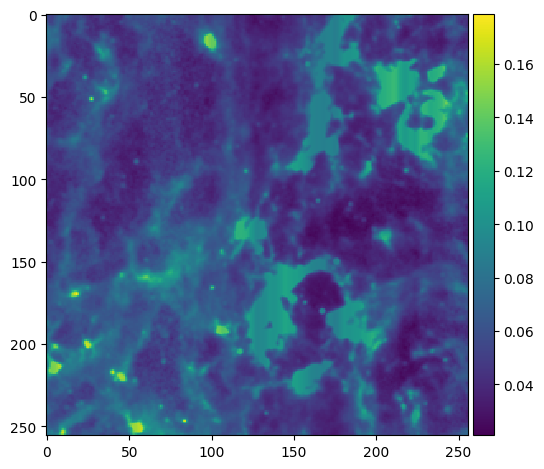

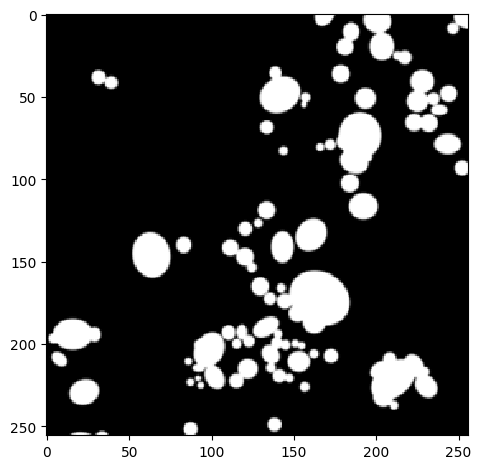

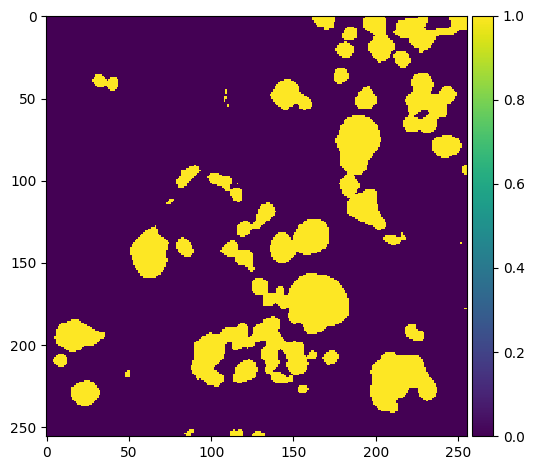

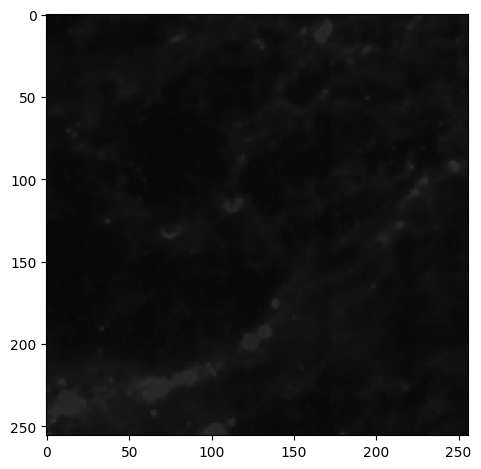

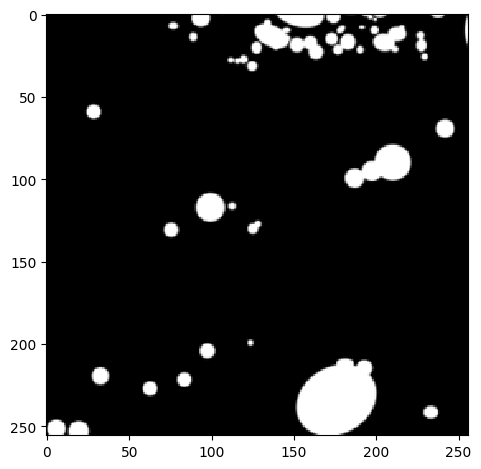

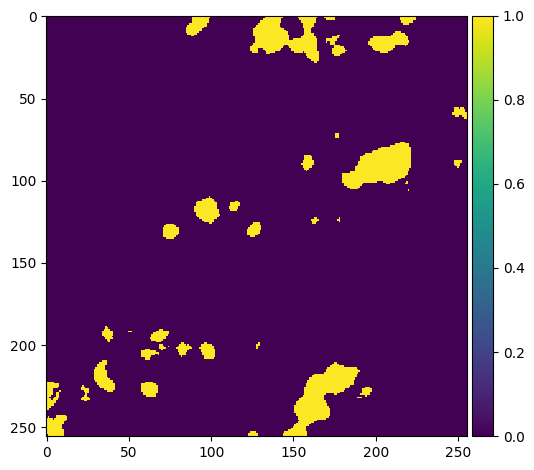

In [10]:
idx = random.randint(0,len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)],verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):],verbose=1)

#binary
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

ix = random.randint(0,len(preds_train_t))
imshow(X_train[ix])
# plt.gca().set_axis_off() # responsible for removing axes.
# plt.savefig(f'./dataset/results/sample_{ix}.png',bbox_inches='tight',pad_inches = 0)
# plt.clf()
plt.show()
imshow(np.squeeze(y_train[ix]))
# plt.gca().set_axis_off() # responsible for removing axes.
# plt.savefig(f'./dataset/results/mask_{ix}.png',bbox_inches='tight',pad_inches = 0)
# plt.clf()
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
# plt.gca().set_axis_off() # responsible for removing axes.
# plt.savefig(f'./dataset/results/prediction_{ix}.png',bbox_inches='tight',pad_inches = 0)
# plt.clf()
plt.show()

ix = random.randint(0,len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
# plt.gca().set_axis_off() # responsible for removing axes.
# plt.savefig(f'./dataset/results/sample_{ix}.png',bbox_inches='tight',pad_inches = 0)
# plt.clf()
plt.show()
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
# plt.gca().set_axis_off() # responsible for removing axes.
# plt.savefig(f'./dataset/results/mask_{ix}.png',bbox_inches='tight',pad_inches = 0)
# plt.clf()
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
# plt.gca().set_axis_off() # responsible for removing axes.
# plt.savefig(f'./dataset/results/prediction_{ix}.png',bbox_inches='tight',pad_inches = 0)
# plt.clf()
plt.show()


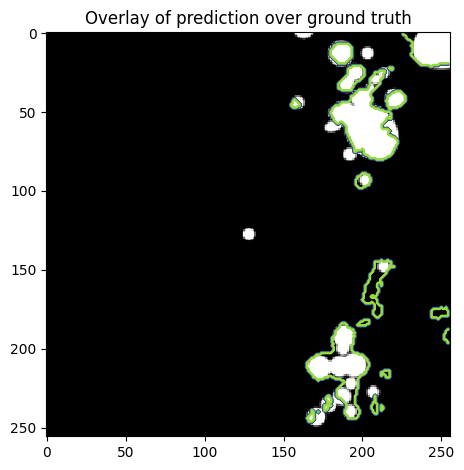

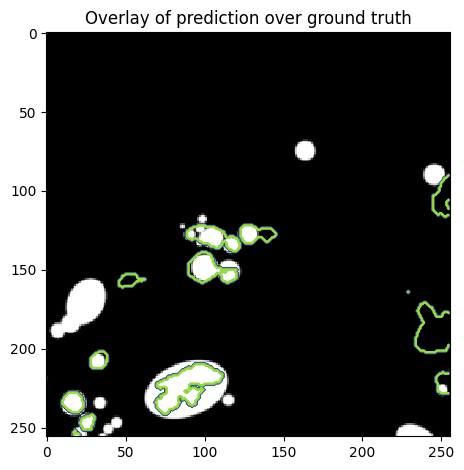

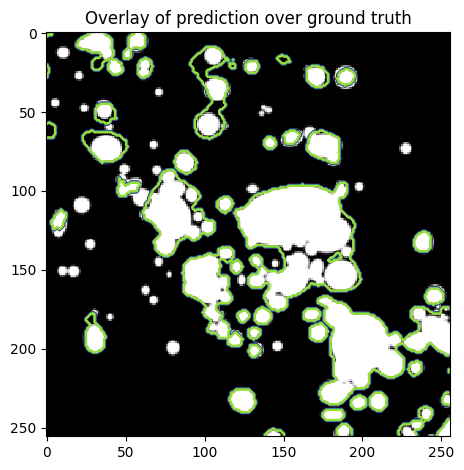

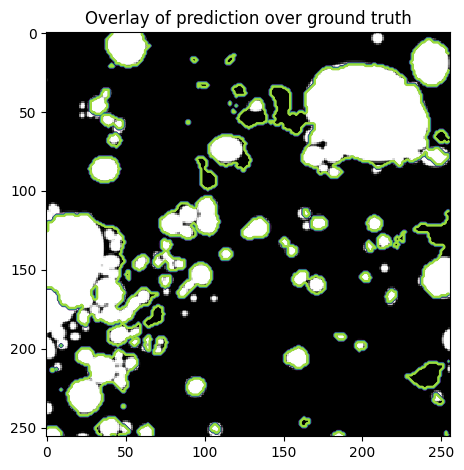

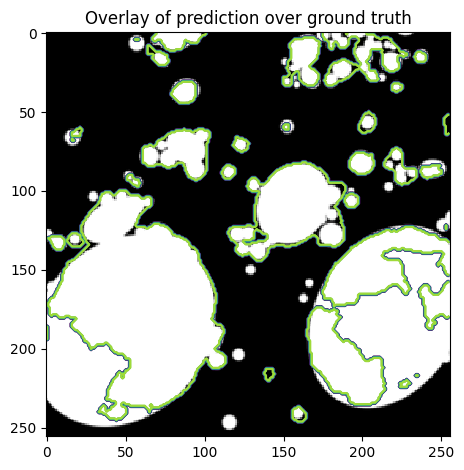

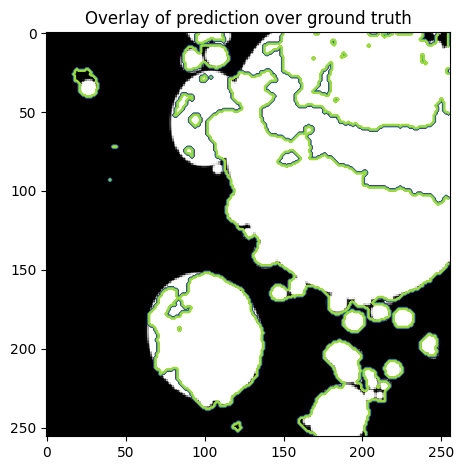

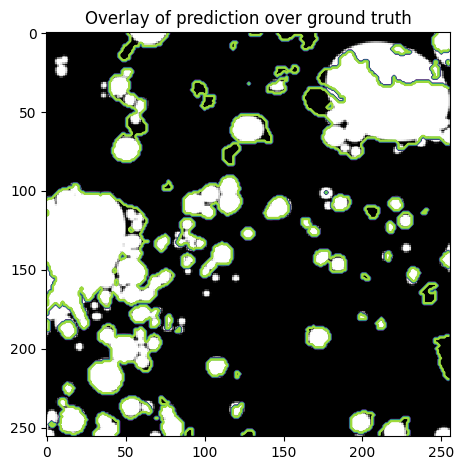

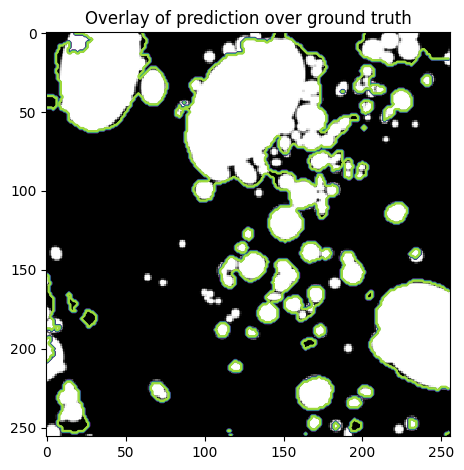

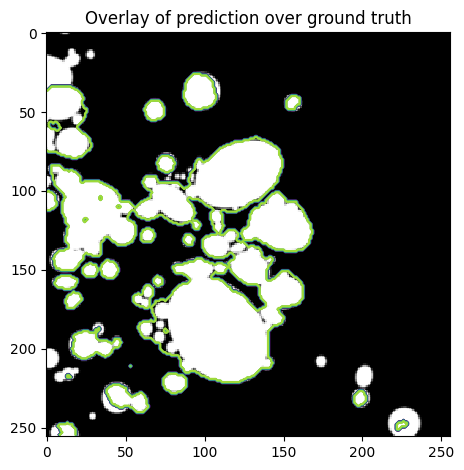

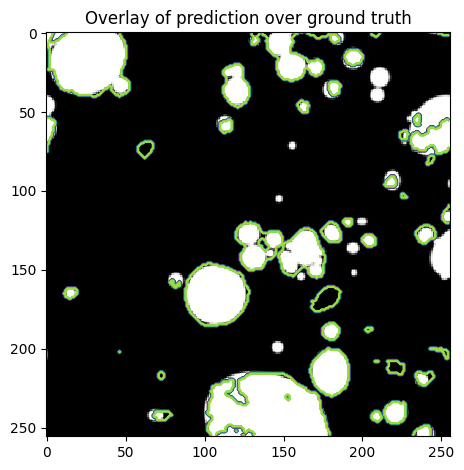

In [11]:
for i in range(10):
    
    ix=random.randint(0,100)
    plt.title('Overlay of prediction over ground truth')
    imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
    plt.contour(np.squeeze(preds_val_t[ix]))
    plt.show()

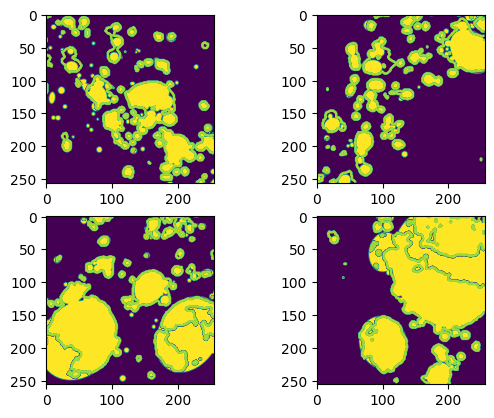

In [12]:
fig, axs = plt.subplots(2, 2)


ix1 = 35
ix2 = 66
ix3 = 43
ix4 = 77



axs[0,0].imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix1]))
axs[0,0].contour(np.squeeze(preds_val_t[ix1]))

axs[0,1].imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix2]))
axs[0,1].contour(np.squeeze(preds_val_t[ix2]))

axs[1,0].imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix3]))
axs[1,0].contour(np.squeeze(preds_val_t[ix3]))

axs[1,1].imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix4]))
axs[1,1].contour(np.squeeze(preds_val_t[ix4]))

#Wplt.savefig('overlay_jaccard.png')


In [21]:
!python3 -m tensorboard.main --logdir=logs/

W0406 18:08:09.713278 6303019008 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0406 18:08:09.722806 6303019008 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0406 18:08:09.724241 6303019008 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C
